In [34]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Função para carregar uma imagem

In [35]:
def load_image(path, grayscale=True):
    """Carrega uma imagem em escala de cinza ou colorida."""
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE if grayscale else cv2.IMREAD_COLOR)
    if img is None:
        print(f"Erro: Não foi possível carregar a imagem {path}")
    return img

# Função para visualizar o domínio da frequência

In [36]:
def plot_frequency_domain(image, title="Frequency Domain"):  
    """Aplica a Transformada de Fourier e exibe o espectro de frequência."""
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    
    plt.figure(figsize=(6,6))
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Função para aplicar filtros no domínio da frequência

In [37]:
def filter_frequency_domain(image, filter_type="bandpass", d_low=30, d_high=100, direction="horizontal"):
    """Aplica um filtro passa-banda ou direcional no domínio da frequência."""
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    
    mask = np.ones((rows, cols), np.uint8) if filter_type == "bandpass" else np.zeros((rows, cols), np.uint8)
    
    if filter_type == "bandpass":
        # Criação da máscara do filtro passa-banda
        for i in range(rows):
            for j in range(cols):
                d = np.sqrt((i - crow)**2 + (j - ccol)**2)
                if not (d_low < d < d_high):
                    mask[i, j] = 0
    
    elif filter_type == "directional":
        # Criação da máscara do filtro direcional
        mask[:] = 1  # Inicializa a máscara com 1
        if direction == "horizontal":
            mask[crow-5:crow+5, :] = 0
        elif direction == "vertical":
            mask[:, ccol-5:ccol+5] = 0
    
    fshift_filtered = fshift * mask
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_filtered = np.fft.ifft2(f_ishift)
    img_filtered = np.abs(img_filtered)
    
    return img_filtered


# Função principal

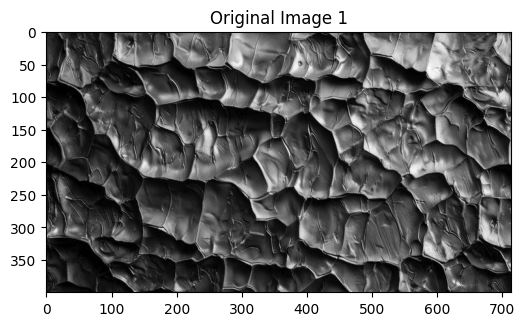

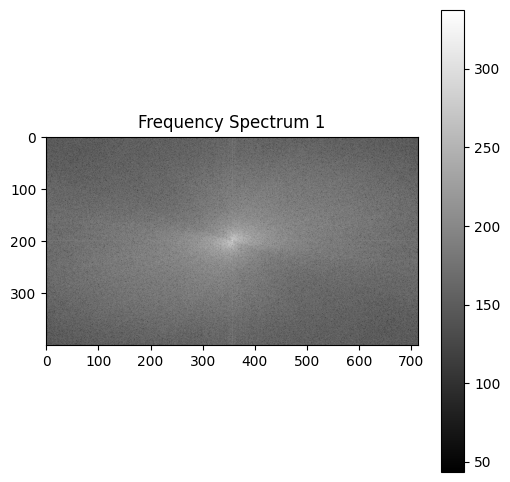

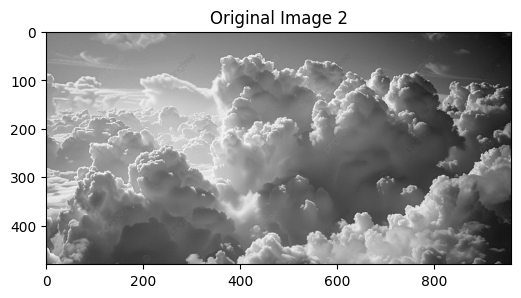

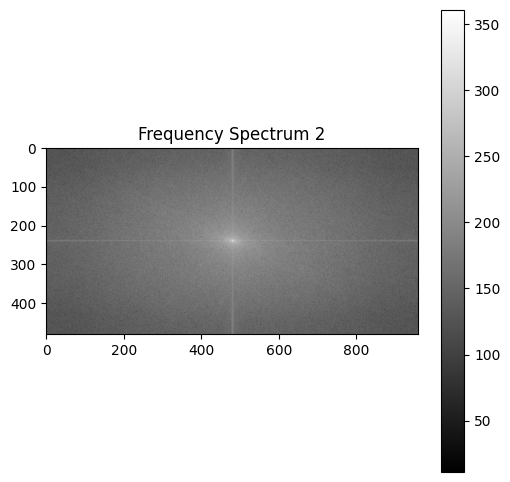

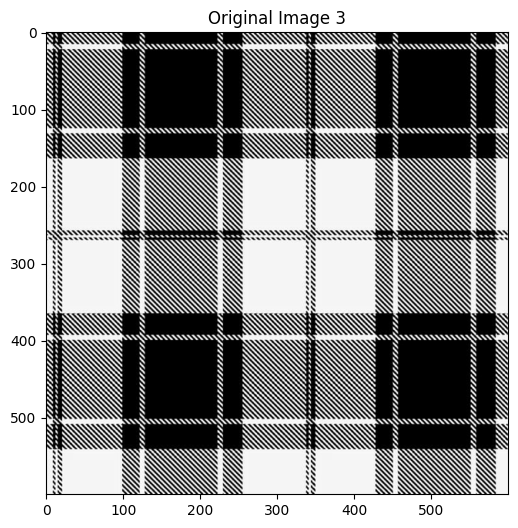

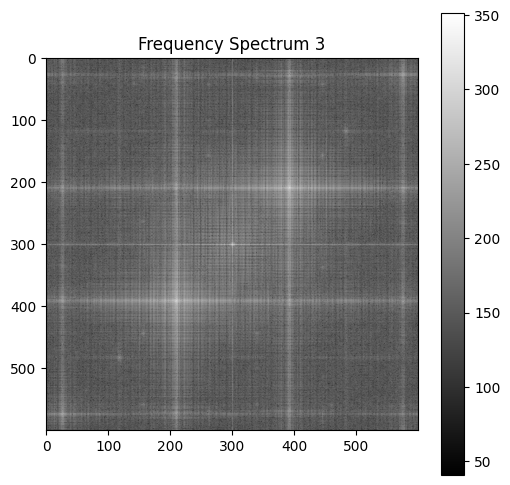

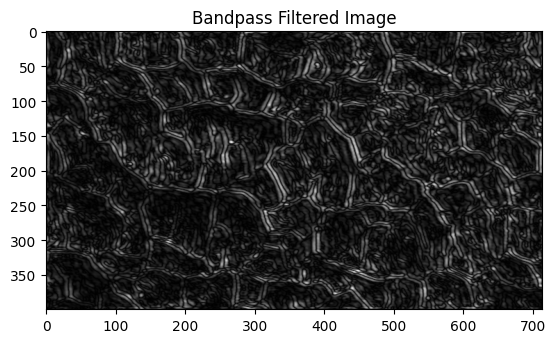

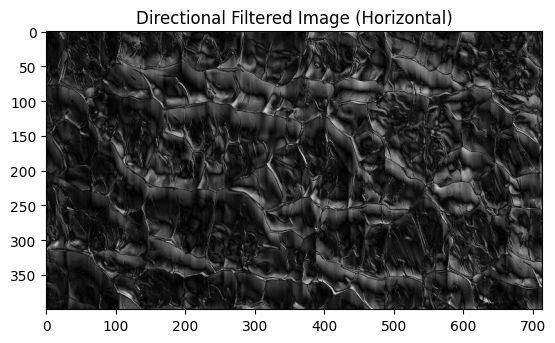

In [38]:
def main():
    """Carrega as imagens, exibe seus espectros e aplica filtros no domínio da frequência."""
    image_paths = ["./imgs/textura.jpg", "./imgs/ceu.jpg", "./imgs/tecidso.png"]
    images = [load_image(path) for path in image_paths]
    images = [img for img in images if img is not None]  # Remove imagens não carregadas
    
    if not images:
        print("Nenhuma imagem carregada. Verifique os caminhos dos arquivos.")
        return
    
    # Exibir imagens originais e seus espectros de frequência
    for i, img in enumerate(images):
        plt.figure(figsize=(6,6))
        plt.imshow(img, cmap='gray')
        plt.title(f"Original Image {i+1}")
        plt.show()
        
        plot_frequency_domain(img, title=f"Frequency Spectrum {i+1}")
    
    # Aplicar e exibir o filtro passa-banda
    filtered_img_bandpass = filter_frequency_domain(images[0], filter_type="bandpass")
    plt.imshow(filtered_img_bandpass, cmap='gray')
    plt.title("Bandpass Filtered Image")
    plt.show()
    
    # Aplicar e exibir o filtro direcional horizontal
    filtered_img_directional = filter_frequency_domain(images[0], filter_type="directional", direction="horizontal")
    plt.imshow(filtered_img_directional, cmap='gray')
    plt.title("Directional Filtered Image (Horizontal)")
    plt.show()
    
if __name__ == "__main__":
    main()
